# Final - PHYS 585

Sharan Venkatesh

Collaborated with : Shreya Gudapati

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal
import scipy

## Part A

### Q1

In [2]:
def d_u(a,b,v,vr,u,dt):
    return(dt*(a*(b*(v-vr)-u)))

In [3]:
def d_v(C,k,v,vr,vt,u,I,dt):
    return((k*(v-vr)*(v-vt) -u +I)*(dt/C))

In [4]:
def izh_model(v,i_arr,C,vr,vt,k,a,b,c,d,dt,total_time):
    n = int(total_time/dt)
    v_arr = []
    u = b * v * 0
    for j in range(n):
        I = i_arr[j] * (-v)
        u = u + d_u(a,b,v,vr,u,dt)
        v = v + d_v(C,k,v,vr,vt,u,I,dt)
        v_arr.append(v)
        if v>=50:
            v = c
            u = u +d
    fig, axs = plt.subplots(2,1,figsize=(5,5))
    fig.tight_layout()
    axs[0].plot(v_arr)
    axs[0].set_title('Output')
    #axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Voltage')
    axs[1].plot(i_arr)
    axs[1].set_title('Input')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Ie')

In [5]:
i_arr = []
for i in range(1000):
    if i>=200 and i<=400:
        j = 10
        i_arr.append(j)
    else:
        i_arr.append(0)


In [6]:
C = 100
vr = -60
vt = -50
k = 3
a = 0.01
b = 5
c = -55
d = 500
dt = 0.1
total_time = 100
v = c

#### Spiking of the Cell body

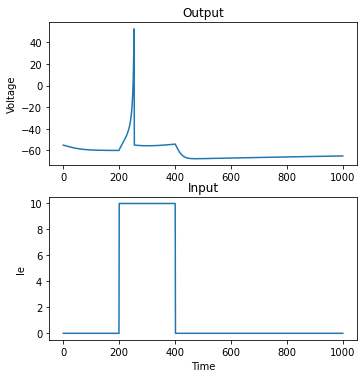

In [7]:
izh_model(v,i_arr,C,vr,vt,k,a,b,c,d,dt,total_time)

### Q2


In [8]:
C = 50
vr = -60
vt = -50
k = 3
a = 0.01
b = 5
c = -55
d = 500
dt = 0.1
total_time = 100
v = c

#### Spiking of the Dendritic spine

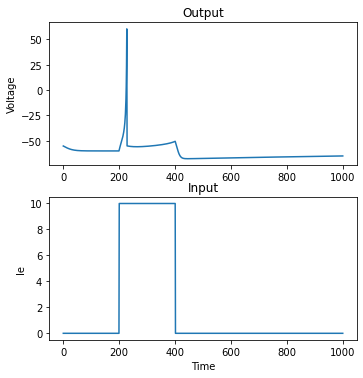

In [9]:
izh_model(v,i_arr,C,vr,vt,k,a,b,c,d,dt,total_time)

### Q3

In [10]:
def d_v_lif(v,vr,k,C,I,dt):
    return((dt/C)*(k*(vr-v)+I))

In [11]:
def lif_mod(v,vr,k,C,c,i_arr,dt,total_time):
    n = int(total_time/dt)
    v_arr = []
    for j in range(n):
        I = i_arr[j] * (-v)
        v = v + d_v_lif(v,vr,k,C,I,dt)
        v_arr.append(v)
        if v>=10:
            v = c

    fig, axs = plt.subplots(2,1)
    fig.tight_layout()
    axs[0].plot(v_arr)
    axs[0].set_title('Output')
    #axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Voltage')
    axs[1].plot(i_arr)
    axs[1].set_title('Input')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Ie')

In [12]:
C = 50
vr = -60
k = 0.7
c = -50
dt = 0.1
total_time = 100
v = c

In [13]:
i_arr = []
for i in range(1000):
    if i>=200 and i<=400:
        j = 5
        i_arr.append(j)
    else:
        i_arr.append(0)


#### Spiking of the dendritic shaft

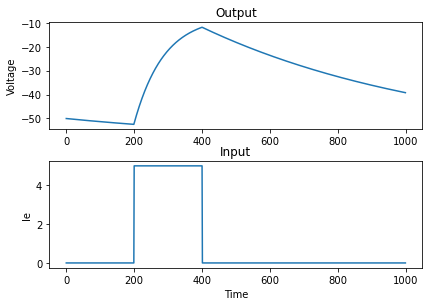

In [14]:
lif_mod(v,vr,k,C,c,i_arr,dt,total_time)


### Q4

#### Compartmental model

In [15]:
wij = np.zeros([4,4])
wij[0] = [0,0,15,0] #spine 1
wij[1] = [0,0,15,0] #spine 2
wij[2] = [15,15,0,150] #shaft
wij[3] = [0,0,150,0] #cell body

In [16]:
def comp_i(ie,wij,v):
    I = np.zeros(4)
    for i in range(4):
        sum_v = 0
        for j in range(4):
            sum_v+=(wij[i][j]*(v[j]-v[i]))
        I[i] = ie[i]*(-v[i])+sum_v 
    return(I)

In [17]:
def comp_mod(ie,wij,v,dt,total_time):
        
        names = ['Spine 1','Spine 2','Shaft','Cell body']
        n = int(total_time/dt)
        v_plot = np.zeros([n,4])
        temp_v = [0,0,0,0]
        v_plot[0] = v
        for i in range(n):
            if i ==0:
                u = np.zeros(4)
                u[0] = 5*v[0]*0
                u[1] = 5*v[1]*0
                u[3] = 5*v[3]*0
                
            I = comp_i(ie[:,i],wij,v)
            
            for j in range(4):
                
                if j == 0 or j == 1:
                    C = 50
                    vr = -60
                    vt = -50
                    k = 3
                    a = 0.01
                    b = 5
                    c = -55
                    d = 500
                    u[j] = u[j] + d_u(a,b,v[j],vr,u[j],dt)
                    temp_v[j] = v[j] + d_v(C,k,v[j],vr,vt,u[j],I[j],dt)
                
                elif j == 2 :
                    C = 50
                    vr = -60
                    k = 0.7
                    c = -50
                    temp_v[j] = v[j] + d_v_lif(v[j],vr,k,C,I[j],dt)
                
                elif j ==3 :
                    C = 100
                    vr = -60
                    vt = -50
                    k = 3
                    a = 0.01
                    b = 5
                    c = -55
                    d = 500
                    u[j] = u[j] + d_u(a,b,v[j],vr,u[j],dt)
                    temp_v[j] = v[j] + d_v(C,k,v[j],vr,vt,u[j],I[j],dt)
            v = temp_v
            if v[0]>=50:
                v[0] = -55
                u[0] = u[0]+d
            if v[1]>=50:
                v[1] = -55
                u[1] = u[1]+d
            if v[2]>=10:
                v[2] = -50
            if v[3]>=50:
                v[3] = -55
                u[3] = u[3]+d
            v_plot[i] = v
        fig,axs = plt.subplots(5,1,figsize=(10,10))
        fig.tight_layout()
        tim = np.linspace(0,100,1000)
        for i in range(4):
            axs[i].plot(tim,v_plot[:,i])
            axs[i].set_ylim([-60,60])
            axs[i].set_title(names[i])
            #axs[i].set_xlabel('Time')
            axs[i].set_ylabel('Voltage')
        axs[4].plot(tim,ie[0,:])
        axs[4].set_title('Input')
        axs[4].set_xlabel('Time')
        axs[4].set_ylabel('Ie')

In [18]:
v = [-55,-55,-50,-55]

In [19]:
ie = np.zeros([4,1000])
i_arr = np.zeros(1000)
j = 5
for i in range(1000):
    if i>=200 and i<=400:
        i_arr[i] = j
ie[0] = i_arr
ie[1] = i_arr
#ie[1] = np.zeros(1000)
ie[2] = np.zeros(1000)
ie[3] = np.zeros(1000)

Spiking of compartment model (Ie - same as before)


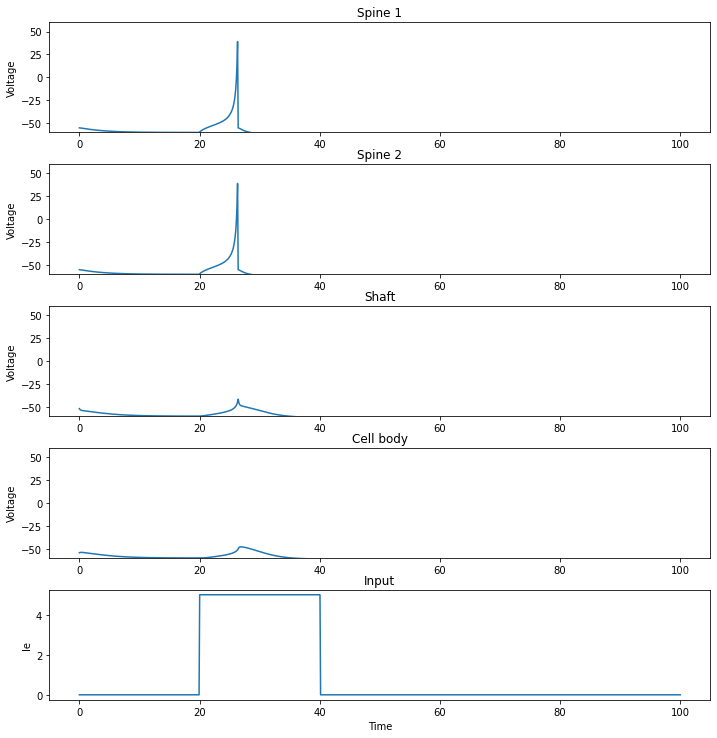

In [20]:
print("Spiking of compartment model (Ie - same as before)")
comp_mod(ie,wij,v,dt,total_time)

### Q5

#### Increasing Ie to get a spike in the compartment model
Here, we used a input of 50 for a duration of 600 ms to get a spike

In [21]:
ie = np.zeros([4,1000])
i_arr = np.zeros(1000)
j = 50
for i in range(1000):
    if i>=200 and i<=800:
        i_arr[i] = j
ie[0] = i_arr
ie[1] = i_arr
#ie[1] = np.zeros(1000)
ie[2] = np.zeros(1000)
ie[3] = np.zeros(1000)

Spiking of compartment model - Ie(50 for 600 ms)


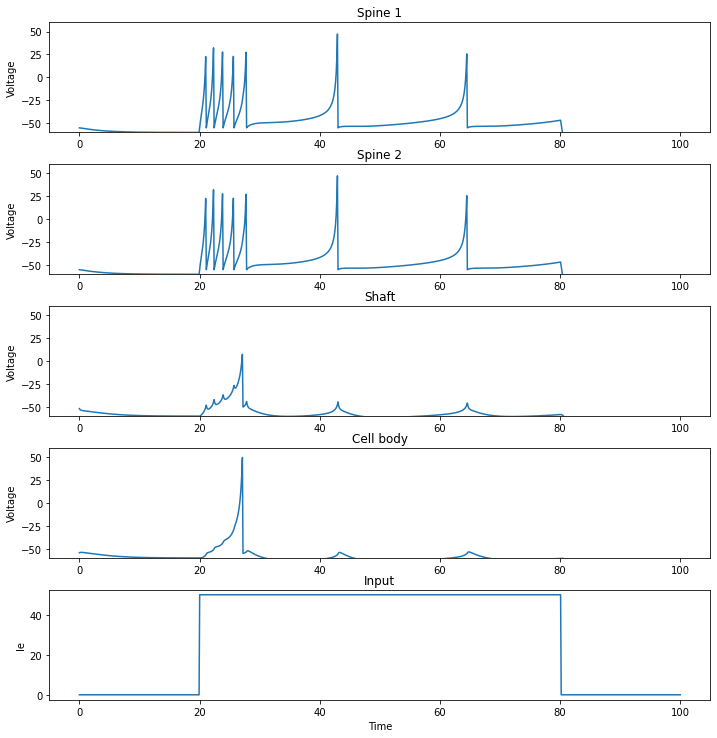

In [22]:
print("Spiking of compartment model - Ie(50 for 600 ms)")
comp_mod(ie,wij,v,dt,total_time)

### Extra Credit

#### Model with inhibitory currents

In [23]:
def comp_i_inhib(ie,wij,v,ii):
    I = np.zeros(4)
    for i in range(4):
        sum_v = 0
        for j in range(4):
            sum_v+=(wij[i][j]*(v[j]-v[i]))
        I[i] = ie[i]*(-v[i])+sum_v +ii[i]*(-70-v[i])
    return(I)

In [24]:
def comp_mod_inhib(ie,ii,wij,v,dt,total_time):
        
        names = ['Spine 1','Spine 2','Shaft','Cell body']
        n = int(total_time/dt)
        v_plot = np.zeros([n,4])
        temp_v = [0,0,0,0]
        v_plot[0] = v
        for i in range(n):
            if i ==0:
                u = np.zeros(4)
                u[0] = 5*v[0]*0
                u[1] = 5*v[1]*0
                u[3] = 5*v[3]*0
                
            I = comp_i_inhib(ie[:,i],wij,v,ii[:,i])
            
            for j in range(4):
                
                if j == 0 or j == 1:
                    C = 50
                    vr = -60
                    vt = -50
                    k = 3
                    a = 0.01
                    b = 5
                    c = -55
                    d = 500
                    u[j] = u[j] + d_u(a,b,v[j],vr,u[j],dt)
                    temp_v[j] = v[j] + d_v(C,k,v[j],vr,vt,u[j],I[j],dt)
                
                elif j == 2 :
                    C = 50
                    vr = -60
                    k = 0.7
                    c = -50
                    temp_v[j] = v[j] + d_v_lif(v[j],vr,k,C,I[j],dt)
                
                elif j ==3 :
                    C = 100
                    vr = -60
                    vt = -50
                    k = 3
                    a = 0.01
                    b = 5
                    c = -55
                    d = 500
                    u[j] = u[j] + d_u(a,b,v[j],vr,u[j],dt)
                    temp_v[j] = v[j] + d_v(C,k,v[j],vr,vt,u[j],I[j],dt)
            v = temp_v
            if v[0]>=50:
                v[0] = -55
                u[0] = u[0]+d
            if v[1]>=50:
                v[1] = -55
                u[1] = u[1]+d
            if v[2]>=10:
                v[2] = -50
            if v[3]>=50:
                v[3] = -55
                u[3] = u[3]+d
            v_plot[i] = v
        fig,axs = plt.subplots(5,1,figsize=(10,10))
        fig.tight_layout()
        tim = np.linspace(0,100,1000)
        for i in range(4):
            axs[i].plot(tim,v_plot[:,i])
            axs[i].set_ylim([-60,60])
            axs[i].set_title(names[i])
            #axs[i].set_xlabel('Time')
            axs[i].set_ylabel('Voltage')
        axs[4].plot(tim,ie[0,:])
        axs[4].set_title('Input')
        axs[4].set_ylabel('Ie')

In [25]:
ie = np.zeros([4,1000])
i_arr = np.zeros(1000)
j = 10
for i in range(1000):
    if i>=200 and i<=600:
        i_arr[i] = j
ie[0] = i_arr
ie[1] = i_arr
#ie[1] = np.zeros(1000)
ie[2] = np.zeros(1000)
ie[3] = np.zeros(1000)

In [26]:
ii = np.zeros([4,1000])
i_arr = np.zeros(1000)
j = 0.5
for i in range(1000):
    if i>=200 and i<=400:
        i_arr[i] = j
ii[0] = np.zeros(1000)
ii[1] = np.zeros(1000)
#ie[1] = np.zeros(1000)
ii[2] = np.zeros(1000)
ii[3] = i_arr

In [27]:
v = [-55,-55,-50,-55]

Text(0, 0.5, 'Ii')

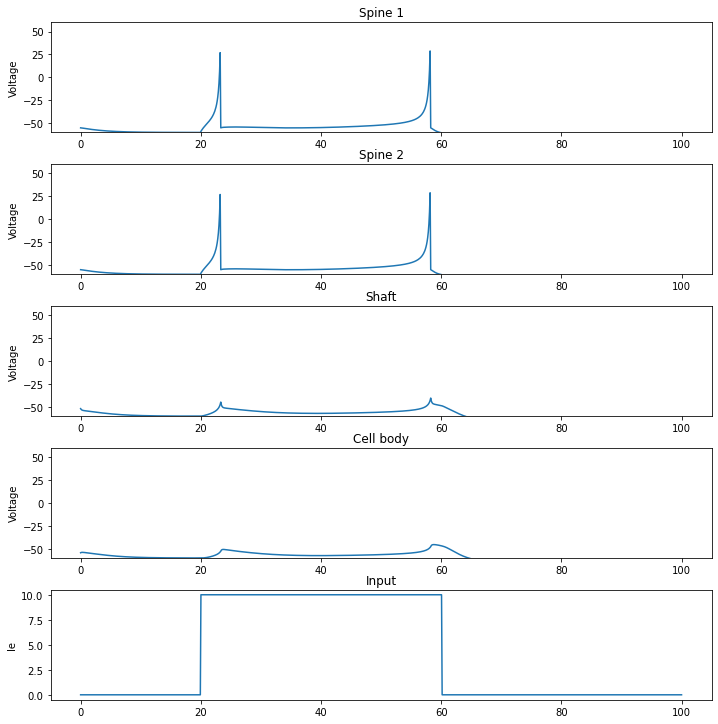

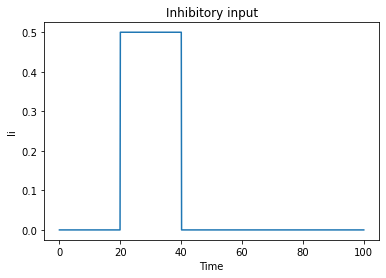

In [28]:
comp_mod_inhib(ie,ii,wij,v,dt,total_time)
tim = np.linspace(0,100,1000)
plt.figure()
plt.plot(tim,ii[3,:])
plt.title('Inhibitory input')
plt.xlabel('Time')
plt.ylabel('Ii')

Inhibitory current applied to the shaft

In [29]:
ii = np.zeros([4,1000])
i_arr = np.zeros(1000)
j = 0.5
for i in range(1000):
    if i>=200 and i<=400:
        i_arr[i] = j
ii[0] = np.zeros(1000)
ii[1] = np.zeros(1000)
#ie[1] = np.zeros(1000)
ii[2] = i_arr
ii[3] = np.zeros(1000)

Text(0, 0.5, 'Ii')

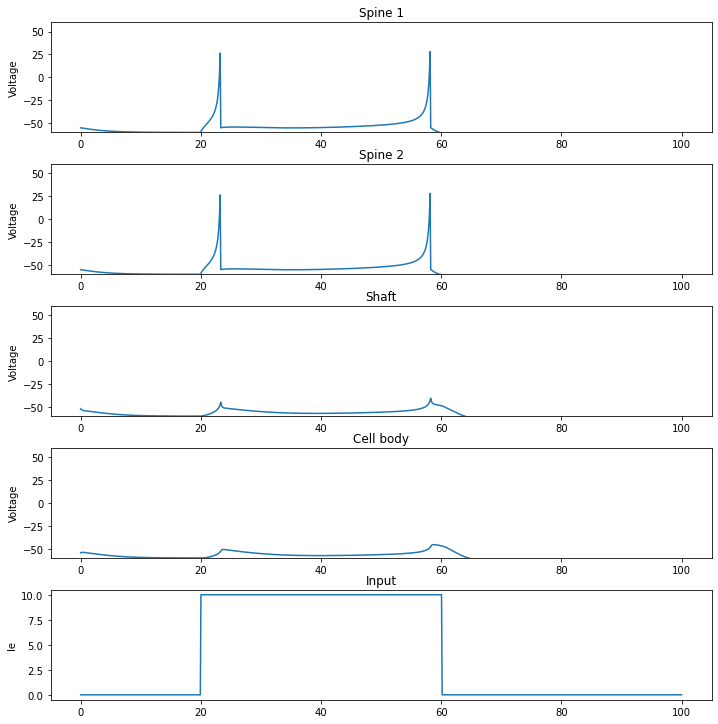

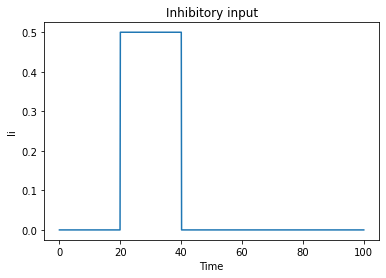

In [30]:
comp_mod_inhib(ie,ii,wij,v,dt,total_time)
tim = np.linspace(0,100,1000)
plt.figure()
plt.plot(tim,ii[2,:])
plt.title('Inhibitory input')
plt.xlabel('Time')
plt.ylabel('Ii')

Applying to cell body after 10ms

In [31]:
ii = np.zeros([4,1000])
i_arr = np.zeros(1000)
j = 0.5
for i in range(1000):
    if i>=300 and i<=500:
        i_arr[i] = j
ii[0] = np.zeros(1000)
ii[1] = np.zeros(1000)
#ie[1] = np.zeros(1000)
ii[2] = np.zeros(1000)
ii[3] = i_arr

Text(0, 0.5, 'Ii')

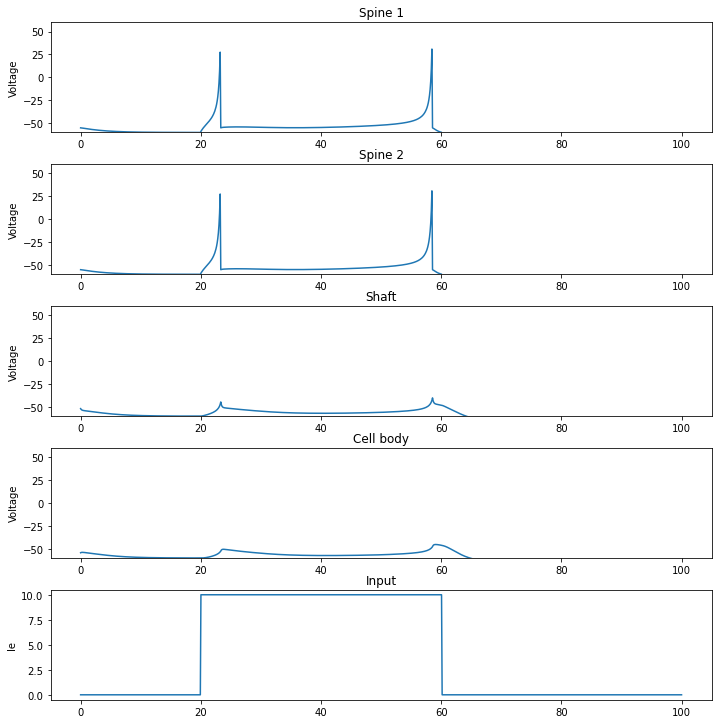

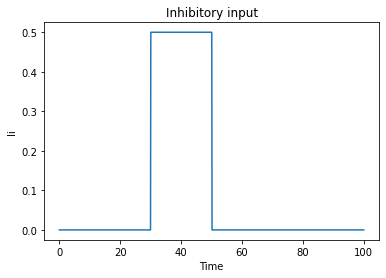

In [32]:
comp_mod_inhib(ie,ii,wij,v,dt,total_time)
tim = np.linspace(0,100,1000)
plt.figure()
plt.plot(tim,ii[3,:])
plt.title('Inhibitory input')
plt.xlabel('Time')
plt.ylabel('Ii')

Applying to shaft after 10 ms

In [33]:
ii = np.zeros([4,1000])
i_arr = np.zeros(1000)
j = 0.5
for i in range(1000):
    if i>=300 and i<=500:
        i_arr[i] = j
ii[0] = np.zeros(1000)
ii[1] = np.zeros(1000)
#ie[1] = np.zeros(1000)
ii[2] = i_arr
ii[3] = np.zeros(1000)

Text(0, 0.5, 'Ii')

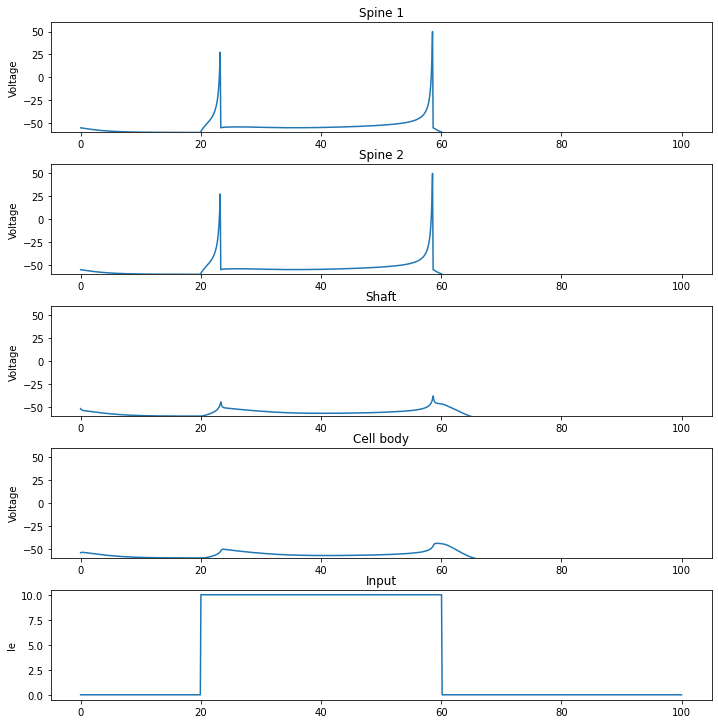

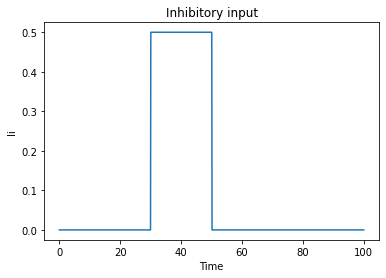

In [34]:
comp_mod_inhib(ie,ii,wij,v,dt,total_time)
tim = np.linspace(0,100,1000)
plt.figure()
plt.plot(tim,ii[2,:])
plt.title('Inhibitory input')
plt.xlabel('Time')
plt.ylabel('Ii')

Here, we would expect the result to be same for when the inhibitory current was applied to either the shaft or the cell body. This is because the voltage propgates from the shaft to the cell body. When inhibitory current is applied on either of these components, there will be inhibition of voltage propogation and hence, there will be similar results for both cases. For the case where the inhibitory input is applied 10ms after the excitatory input, we do not get a clear picture for these values. However, the image below shows the values when ie is 20 and ii is 0.5. Here, we see that there is an increase in both the shaft and the cell body voltage until 30ms. This is when the inhibitory current is applied. This results in the reduction of voltages after 30ms.

In [35]:
ie = np.zeros([4,1000])
i_arr = np.zeros(1000)
j = 20
for i in range(1000):
    if i>=200 and i<=600:
        i_arr[i] = j
ie[0] = i_arr
ie[1] = i_arr
#ie[1] = np.zeros(1000)
ie[2] = np.zeros(1000)
ie[3] = np.zeros(1000)

In [36]:
ii = np.zeros([4,1000])
i_arr = np.zeros(1000)
j = 0.5
for i in range(1000):
    if i>=300 and i<=500:
        i_arr[i] = j
ii[0] = np.zeros(1000)
ii[1] = np.zeros(1000)
#ie[1] = np.zeros(1000)
ii[2] = i_arr
ii[3] = np.zeros(1000)

Text(0, 0.5, 'Ii')

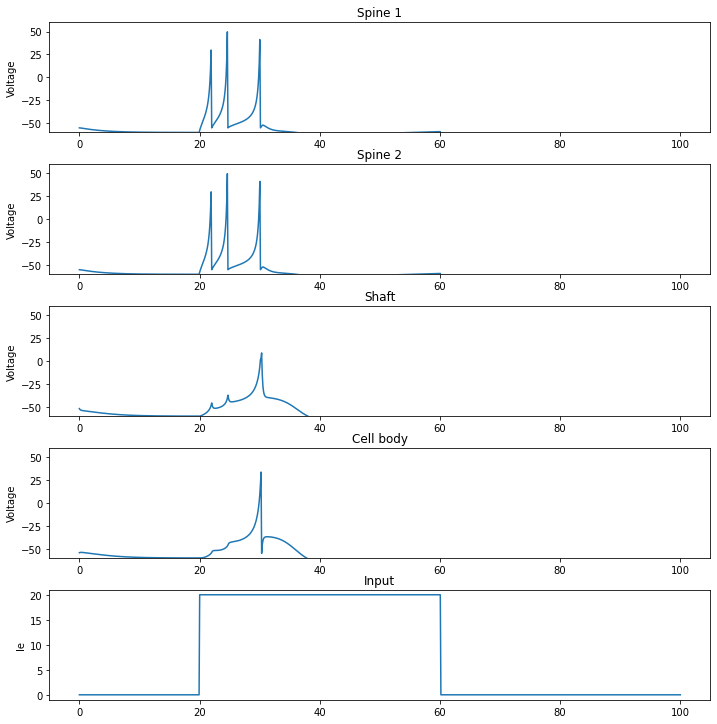

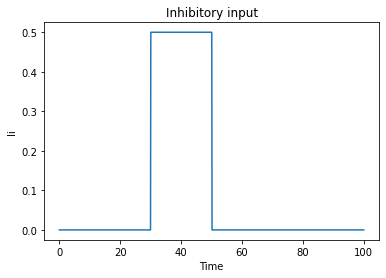

In [37]:
comp_mod_inhib(ie,ii,wij,v,dt,total_time)
tim = np.linspace(0,100,1000)
plt.figure()
plt.plot(tim,ii[2,:])
plt.title('Inhibitory input')
plt.xlabel('Time')
plt.ylabel('Ii')

# Part C

In [38]:
def file_parser(file_n):
    # Function to load the file
    info = scipy.io.loadmat(file_n)
    return info

In [39]:
dat = file_parser("stc_example.mat")


### Q1

#### Showing that the input is like a gaussian distribution

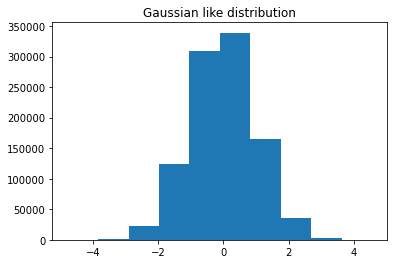

In [40]:
a = np.array(dat['stimulus'])
a = a.flatten()
plt.hist(a)
plt.title('Gaussian like distribution')
plt.show()

### Q2

#### Showing that the signal is uncorelated

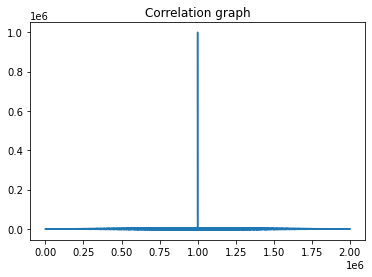

In [41]:
plt.plot(signal.correlate(a,a))
plt.title('Correlation graph')
plt.show()

From this graph we can tell that the stimulus is uncorrelated in time

### Q3 and Q4

#### Building the Spike triggered Average and collecting the stimulus ensemble

Here I built the Ensemble matrix during the calculation of the spike triggered average

In [42]:
time_width = 250
stim = np.array(dat['stimulus'])
stim = stim.flatten()
spikes = np.array(dat['spikes'])
spikes = spikes.flatten()
spike_times = (np.nonzero(spikes))[0]

In [43]:
def sta_calc(spike_times,stim,width = 250):
    s_mat = np.zeros((len(spike_times),width))
    sta_y = np.zeros(width)
    n_spikes = len(spike_times)
    print(len(sta_y))
    for j in range(width):
        stim_sum = 0
        for i in range(n_spikes):
            ind = spike_times[i]
            stim_sum += stim[ind-j]
            if j == width-1:
                s_mat[i] = stim[ind-j:ind+1][::-1]
        sta_calc = stim_sum/n_spikes
        sta_y[j] = sta_calc
    sta_y = sta_y/np.linalg.norm(sta_y)
    
    return sta_y,s_mat

In [44]:
%%time
sta_var,s_mat = sta_calc(spike_times,stim,time_width)

250
CPU times: user 2.05 s, sys: 12.7 ms, total: 2.06 s
Wall time: 2.09 s


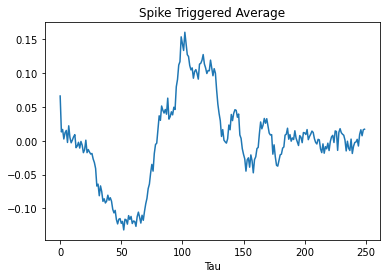

In [45]:
tau = np.arange(250)
tau = tau[::-1]
plt.plot(tau,sta_var[:250][::-1])
plt.title('Spike Triggered Average')
plt.xlabel('Tau')

plt.show()

In [46]:
s_mat.shape

(12385, 250)

### Q5

#### Subtracting the direction from each stimulus

In [47]:
s_ens = np.zeros([len(s_mat),250])
a_norm = ((np.sqrt(np.sum(np.square(sta_var[:250])))))
for i in range(len(s_mat)):
    s_ens[i] = s_mat[i] - np.dot(np.dot((s_mat[i].T),np.flip(sta_var[:250])),np.flip(sta_var[:250]))/a_norm

### Q6

#### Building a covariance matrix based on the ensemble

In [48]:
cov_mat = np.cov(np.transpose(s_ens))

In [49]:
print("The shape of the covaraince matrix - ")
print(cov_mat.shape)

The shape of the covaraince matrix - 
(250, 250)


### Q7

A covariance matrix is a symmetric matrix whose elements contain the values of covariances between elements of a another matrix. This matrix talks about the variation of the data present in the matrix of interest. If the values between two variables are high, it means that there is a correlation between the two variables. if the value is negative, that means there is a negative correlation between them. When the value is 0, it means that there is variation among the variables.

### Q8

#### Calculating Eigenvalues and Eigenvectors for the covariance matrix

In [50]:
w,v = np.linalg.eig(cov_mat)

When we calculate the eigenvalues and eigenvectors of a covariance matrix, we are basically calculating variation of the data along the eigenvectors. The magintude of this variance are the eigenvalues. The eigenvectors as stated are the directions of the new feature space.

### Q9

#### Plotting Eigenvalues

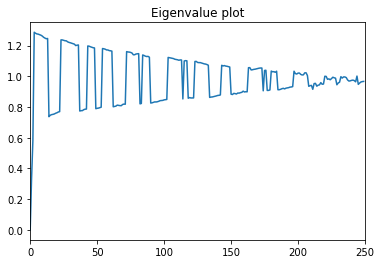

In [51]:
plt.plot(w)
plt.title('Eigenvalue plot')
plt.xlim([0,250])
plt.show()

In [52]:
print("The Significant value that is very close to 0 - ",w[0])

The Significant value that is very close to 0 -  1.6653345369377348e-16


### Q10

#### Integrating the significant eigenvector

In [53]:
deviation = 0
for i in range(1,len(w)):
    dev = 1-w[i]
    if dev>deviation:
        deviation = dev
        eig_index = i
print("The significant value -", w[eig_index])

The significant value - 0.3294817336025326


This is a suppresive eigenvalue.

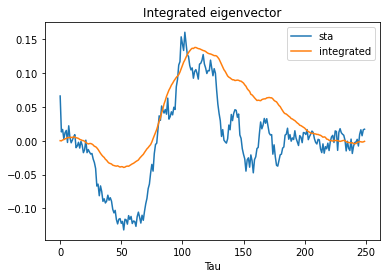

In [54]:
int_sta = np.zeros(250)
prev = 0
for i in range(249,0,-1):
    int_sta[i] = ( prev + v[i][eig_index+1])
    prev = int_sta[i]
int_sta=int_sta/np.linalg.norm(int_sta)
plt.plot(tau,sta_var[::-1],label ='sta')
plt.plot(tau,int_sta[::-1],label='integrated')
plt.xlabel('Tau')
plt.title('Integrated eigenvector')
plt.legend()
plt.show()

The integrated eigenvector matches the sta. Thus it is the derivative of the sta

### Extra credit

In [55]:
s_sub_len = np.zeros((11))
w_mat = np.zeros((10,250))
for k in range(10,0,-1):
    s_ens_subset = np.zeros((int(len(s_mat)/k),250))
    for j in range(0,len(s_mat),k):
        s_ens_subset[int(k/10)] = s_mat[k]
    s_ens = np.zeros([len(s_ens_subset),250])
    a_norm = ((np.sqrt(np.sum(np.square(sta_var[:250])))))
    for i in range(int(len(s_mat)/k)):
        s_ens[i] = s_mat[i] - np.dot(np.dot((s_ens_subset[i].T),np.flip(sta_var[:250])),np.flip(sta_var[:250]))/a_norm
    cov_mat = np.cov(np.transpose(s_ens))
    w,v = np.linalg.eig(cov_mat)
    s_sub_len[10-k] = len(s_ens_subset) 
    w_mat[10-k] = w

In [56]:
s_sub_len

array([ 1238.,  1376.,  1548.,  1769.,  2064.,  2477.,  3096.,  4128.,
        6192., 12385.,     0.])

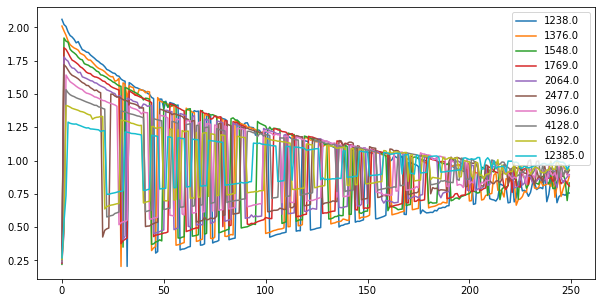

In [57]:
plt.figure(figsize=(10,5))
for i in range(len(w_mat)):
    plt.plot(w_mat[i],label =s_sub_len[i])
plt.legend(loc =1)
plt.show()

Here I have plotted all the eigenvalues from each subset. The legend shows the number of elements considered in each subset. We see that there are few values that merge, or remain stable. This is value 1 as shown below (in a clearer plot)

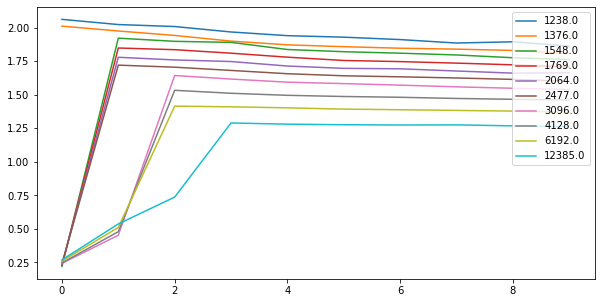

In [58]:
plt.figure(figsize=(10,5))
for i in range(len(w_mat)):
    plt.plot(w_mat[i][:10],label =s_sub_len[i])
plt.legend(loc =1)
plt.show()